## Clustering

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris(as_frame=True)

In [2]:
df=iris['data']

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [6]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
kmeans.inertia_

78.851441426146

In [9]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
df['label']=kmeans.labels_

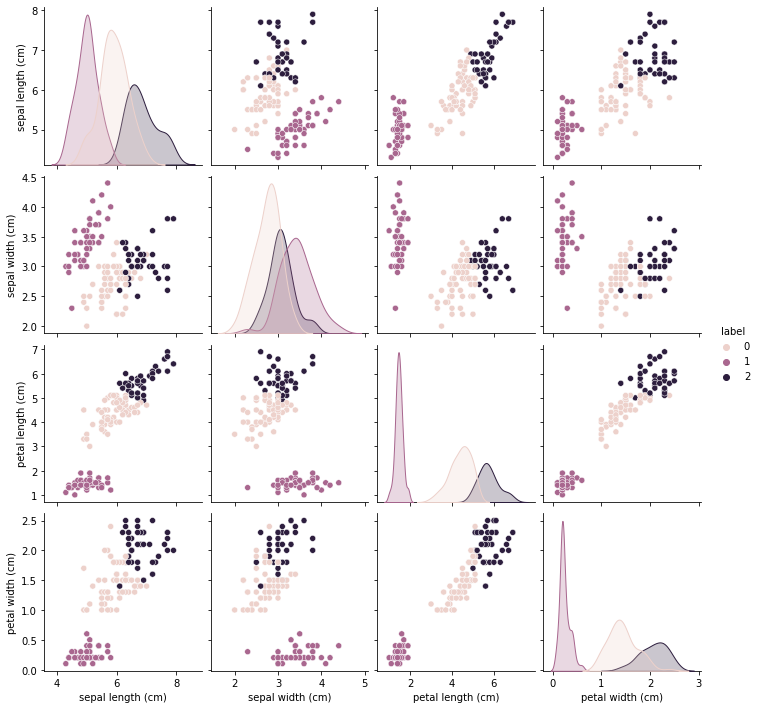

In [14]:
import seaborn as sns
sns.pairplot(df, hue='label')

In [16]:
iris = datasets.load_iris(as_frame=True)
df = iris['data']

In [18]:
cn=[]
measure=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df)
    cn.append(i)
    measure.append(kmeans.inertia_)

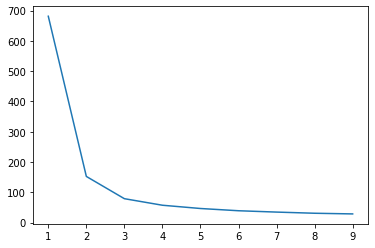

In [19]:
import matplotlib.pyplot as plt
plt.plot(cn,measure)

## Hierarchical Clustering

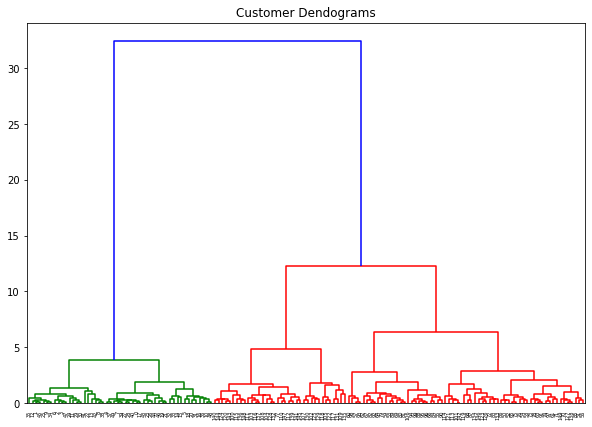

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,)
hc.fit(df)

AgglomerativeClustering(n_clusters=3)

In [28]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## PCA with Clustering

In [34]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/tykiww/projectpage/master/datasets/credit/Credit.csv')
df=df.iloc[:,1:]

In [70]:
df.head().T

,0,1,2,3,4
Income,14.891,106.025,104.593,148.924,55.882
Limit,3606,6645,7075,9504,4897
Rating,283,483,514,681,357
Cards,2,3,4,3,2
Age,34,82,71,36,68
Education,11,15,11,11,16
Gender,Male,Female,Male,Female,Male
Student,No,Yes,No,No,No
Married,Yes,Yes,No,No,Yes
Ethnicity,Caucasian,Asian,Asian,Asian,Caucasian


In [38]:
df2=pd.get_dummies(df,columns=['Gender','Student','Married','Ethnicity'])

In [40]:
df2=(df2-df2.mean())/df2.std()

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df2)
pca.explained_variance_ratio_

array([0.21565593, 0.13908506, 0.12920438, 0.11701967, 0.10304477,
       0.07963194, 0.06494692, 0.06240724, 0.05839719, 0.02928619])

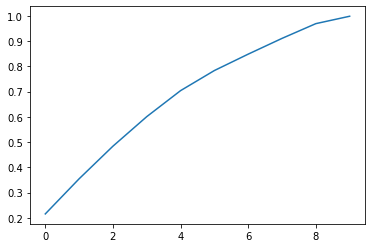

In [48]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [49]:
z = pca.transform(df2)
z

array([[-1.25851289, -1.51666778, -0.32037979, ..., -1.45691811,
        -0.41894518, -0.27618521],
       [ 2.66246482,  2.78078905,  2.69453265, ...,  1.9608716 ,
        -1.00018102,  0.82686761],
       [ 1.80632479, -0.01957786, -2.07621455, ...,  0.81487321,
        -0.65925219,  0.89653544],
       ...,
       [-0.40324834, -0.86062833,  1.34878191, ...,  0.96930918,
         0.03879266,  0.80457216],
       [-1.86063036, -1.50066296, -0.30883428, ..., -0.6834578 ,
        -0.78432044,  0.45836653],
       [ 0.51250119,  1.15029388, -0.03166691, ..., -0.13720366,
        -0.5531852 , -1.12639496]])

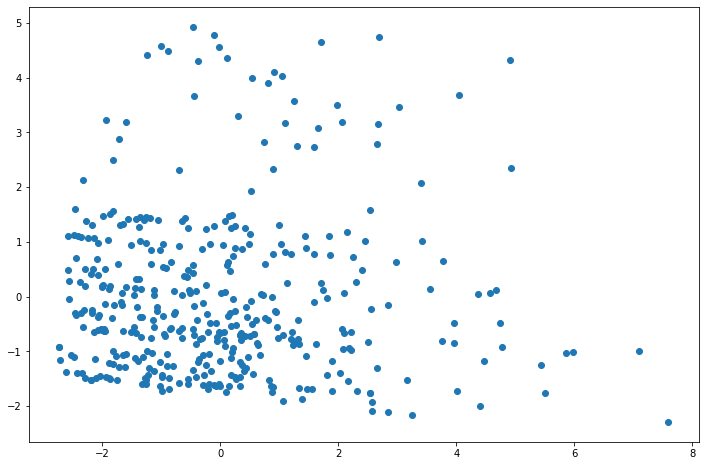

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(z[:,0],z[:,1],c=)

## Clustering

In [55]:
data=z[:,:2]

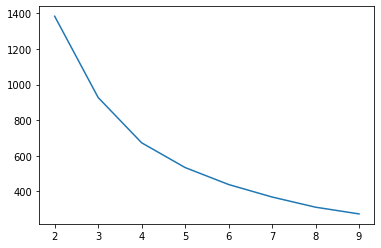

In [58]:
from sklearn.cluster import KMeans
k = []
error = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    k.append(i)
    error.append(kmeans.inertia_)
    
plt.plot(k, error)

In [59]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [68]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

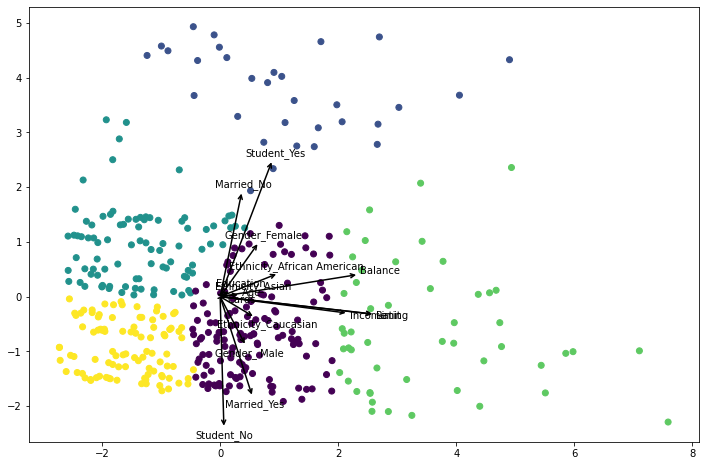

In [69]:
factor=pca.components_[:2,:].T
plt.figure(figsize=(12,8))
plt.scatter(z[:,0],z[:,1],c=kmeans.labels_)
for i in range(len(df2.columns)):
    plt.annotate(df2.columns[i],xy=(0,0),xytext=(factor[i]*5),arrowprops={'lw':1.5, 'arrowstyle':'<-'})